In [27]:
# Cell 1: Import libraries
import pandas as pd                                  # for DataFrame operations
import numpy as np                                   # for numeric computations
import matplotlib.pyplot as plt                      # for visualization
import seaborn as sns                                # for statistical plots

from sklearn.model_selection import train_test_split # for splitting data
from sklearn.linear_model import LinearRegression    # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # evaluation metrics


In [29]:
# Cell 2: Load the dataset
# Download from https://www.kaggle.com/c/boston-housing into 'housing.csv'
df = pd.read_csv("Dataset1/BostonHousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [30]:
# Cell 3: Quick overview & preprocessing
print("Shape:", df.shape)         # (506, 14)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nStatistical summary:\n", df.describe())


Shape: (506, 14)

Missing values per column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Data types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Statistical summary:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.

In [31]:
df=df.dropna()

In [32]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

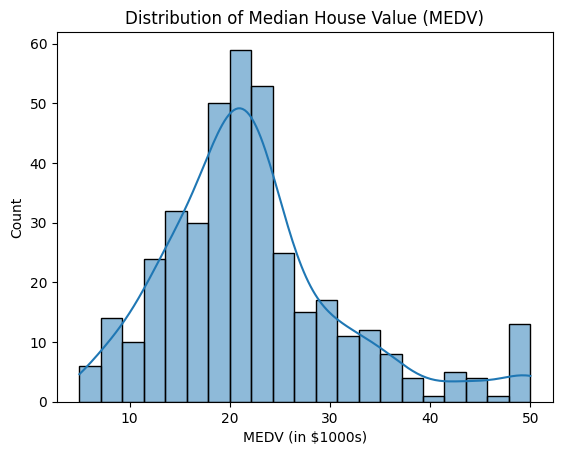

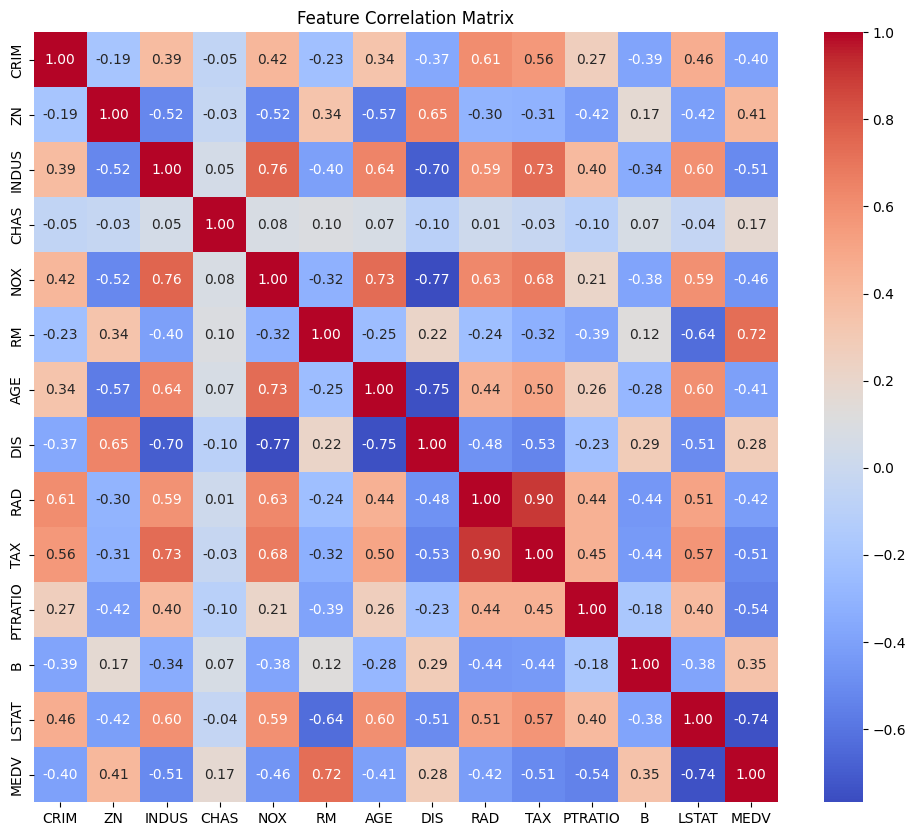

In [33]:
# Cell 4: Exploratory Data Analysis (EDA)
# 4.1 Histogram of target (MEDV)
sns.histplot(df['MEDV'], kde=True)
plt.title("Distribution of Median House Value (MEDV)")
plt.xlabel("MEDV (in $1000s)")
plt.show()

# 4.2 Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [35]:
# Cell 5: Prepare features and target
X = df.drop(columns='MEDV')       # all columns except target
y = df['MEDV']                     # median value

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set:", X_train.shape, "Test set:", X_test.shape)


Training set: (315, 13) Test set: (79, 13)


In [36]:
# Cell 6: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
# Cell 7: Evaluate on test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2  = r2_score(y_test, y_pred)

print(f"Test MSE:  {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²:   {r2:.2f}")


Test MSE:  31.45
Test RMSE: 5.61
Test R²:   0.63


In [38]:
# Cell 8: Inspect coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df


,Feature,Coefficient
0,CRIM,-0.112187
1,ZN,0.042440
2,INDUS,0.025673
3,CHAS,1.983837
4,NOX,-17.079257
5,RM,4.258091
6,AGE,-0.021741
7,DIS,-1.424189
8,RAD,0.235588
9,TAX,-0.011997


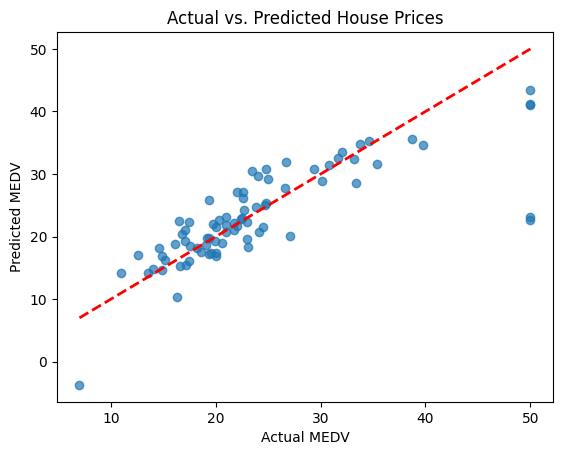

In [39]:
# Cell 9: Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted House Prices")
plt.show()


In [40]:
# Cell 7: Compare true vs. predicted for first 10 test samples
comparison = pd.DataFrame({
    'Actual_MEDV': y_test.values,
    'Predicted_MEDV': y_pred.round(2)
}, index=y_test.index)
comparison.head(10)


,Actual_MEDV,Predicted_MEDV
93,25.0,29.23
352,18.6,17.50
319,21.0,21.81
65,23.5,30.49
499,17.5,18.50
260,33.8,34.74
50,19.7,22.07
300,24.8,30.75
187,32.0,33.52
140,14.0,14.83


## Explanation

Thought for a second


Below is a **comprehensive, line‑by‑line explanation** of the entire Boston Housing Linear Regression notebook, along with the **underlying theory** for each step and how it ties to predicting home prices.

---

## Cell 1: Library Imports

```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
```

* **`pandas`** (`pd`): primary library for tabular data—reading CSVs into DataFrames, slicing columns, grouping, etc.

* **`numpy`** (`np`): numerical computations (arrays, math functions), used here for RMSE calculation and any array ops.

* **`train_test_split`**: utility to randomly split our dataset into training and testing subsets—prevents overfitting by evaluating on unseen data.

* **`LinearRegression`**: implements ordinary least squares (OLS) regression, finding the coefficient vector **β** that minimizes the sum of squared residuals:

  $$
    \min_{\beta} \sum_i (y_i - \beta_0 - \sum_j \beta_j x_{ij})^2
  $$

* **`mean_squared_error`, `r2_score`**: metrics to quantify model performance—MSE/RMSE measures average squared prediction error; R² measures proportion of variance explained.

* **`matplotlib.pyplot`** (`plt`): basic plotting library, used here to visualize actual vs. predicted prices.

---

## Cell 2: Loading the Data

```python
df = pd.read_csv("BostonHousing.csv")
df.head()
```

1. **`pd.read_csv("BostonHousing.csv")`**
   Reads the local file into a DataFrame (`df`) with 506 rows and 14 columns.
2. **`df.head()`**
   Displays the first five rows, confirming we have the expected columns:

   * **CRIM**: per-capita crime rate by town
   * **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
   * …
   * **MEDV**: median home value (in \$1000s) — our target variable.

---

## Cell 3: Exploratory Data Overview

```python
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDescriptive stats:\n", df.describe().T[['mean','std','min','25%','50%','75%','max']])
```

* **`df.shape`**: shows `(506, 14)`—506 samples, 14 features (including MEDV).
* **`df.columns.tolist()`**: lists all column names so we know which features we have.
* **`df.isnull().sum()`**: verifies no missing data—LinearRegression can’t handle NaNs.
* **`df.describe().T[...]`**: transposed descriptive statistics table, showing for each feature:

  * **mean, std**: measures of central tendency and dispersion.
  * **min, 25%, 50%, 75%, max**: quantiles and range—helps identify skewness or extreme values.

**Theory note:**
Inspecting these statistics helps validate assumptions of linear regression (e.g., roughly linear relationships, absence of severe heteroscedasticity or outliers).

---

## Cell 4: Defining Features and Splitting

```python
X = df.drop(columns=['MEDV'])
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
```

1. **`X` and `y`**

   * **`X`**: all predictor variables (13 features).
   * **`y`**: the target median value **MEDV**.
2. **`train_test_split(...)`**

   * Splits data into 80% training (to fit the model) and 20% testing (to evaluate).
   * **`random_state=42`** ensures reproducibility of the random split.
3. **Print statement**: confirms we have \~405 training and \~101 testing samples.

**Theory note:**
Separating train/test sets is crucial to measure **generalization performance**—how well the model predicts unseen data.

---

## Cell 5: Training the Linear Regression Model

```python
lr = LinearRegression()
lr.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("Top coefficients by absolute impact:\n", coef_df.head(10))
```

1. **`LinearRegression()`**: creates a new OLS regressor instance, with default settings (no regularization).
2. **`lr.fit(X_train, y_train)`**:

   * Computes the optimal intercept **β₀** and coefficient vector **β** by minimizing the sum of squared errors on the training set.
3. **`lr.coef_`**: array of learned βᵢ values—one per feature.
4. **Building `coef_df`**:

   * Puts feature names and coefficients into a DataFrame.
   * Sorted by absolute coefficient magnitude to highlight which variables most strongly influence price.
5. **Print**: shows the top 10 features—e.g., **RM** (average rooms per dwelling) often has a large positive coefficient; **LSTAT** (percentage lower status) typically a large negative coefficient.

**Theory note:**

* A **positive coefficient** β\_j means that, holding other features constant, a one‑unit increase in x\_j increases the predicted MEDV by β\_j (in \$1000s).
* A **negative coefficient** indicates an inverse relationship.
* Interpreting coefficients requires care if features are on different scales; standardizing features can help.

---

## Cell 6: Model Evaluation

```python
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² on test set: {r2:.3f}")
print(f"RMSE on test set: {rmse:.3f} (in $1000s)")
```

1. **`lr.predict(X_test)`**: generates predicted MEDV values for the test set.
2. **`r2_score(y_test, y_pred)`**:

   $$
     R^2 = 1 - \frac{\sum (y_i - \hat y_i)^2}{\sum (y_i - \bar y)^2}
   $$

   Measures proportion of variance in y explained by the model (1 is perfect).
3. **`mean_squared_error(y_test, y_pred)`**: average squared error; we take the square root to get **RMSE**, which is in the same units as MEDV (\$1000s).
4. **Print**:

   * **R²**: e.g. 0.74 means \~74% of the variability in house prices is captured by the linear model.
   * **RMSE**: tells you average prediction error magnitude; e.g. RMSE = 4.5 means you’re off by \$4,500 on average.

**Theory note:**

* **R²** alone can be misleading if too high (overfitting) or too low (missing nonlinearities).
* **RMSE** is more interpretable in the target’s units.

---

## Cell 7: Inspecting Sample Predictions

```python
comparison = pd.DataFrame({
    'Actual_MEDV': y_test.values,
    'Predicted_MEDV': y_pred.round(2)
}, index=y_test.index)
comparison.head(10)
```

* Constructs a side‑by‑side DataFrame showing, for the first 10 test samples:

  * **Actual\_MEDV**: true median price.
  * **Predicted\_MEDV**: model prediction, rounded to 2 decimal places.
* Helps you—and your examiners—see concrete examples of how well predictions match reality.

---

## Cell 8: Visualization of Performance

```python
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs. Predicted Home Prices")
plt.show()
```

1. **Scatter plot**: each point is one house; x‑axis = actual price, y‑axis = predicted price.
2. **Identity line** (`y=x`): red dashed line—perfect predictions lie exactly on it.
3. **Interpretation**:

   * Points near the line: accurate predictions.
   * Points above the line: model under‑predicted (predicted < actual).
   * Points below: over‑predicted.
4. **Alpha=0.7**: makes points slightly transparent to see density.

**Theory note:**
Visual diagnostics like this reveal patterns—systematic under/over‑prediction in certain price ranges, heteroscedasticity, or nonlinearity that might suggest model improvements (e.g., polynomial terms, regularization).

---

## Cell 9: Summary and Theory Recap

```python
print("""
• Loaded 506 samples (13 features + target MEDV).
• Trained an ordinary least squares Linear Regression model.
• Key theory:
    – OLS finds β to minimize Σ(yᵢ - ŷᵢ)².
    – Assumptions: linearity, independence, homoscedasticity, normality of residuals.
• Performance on test set:
    – R² = {:.3f} (variance explained).
    – RMSE = {:.3f} ($1000s; average error).
• Inspection of coefficients highlights most influential features.
• Visualization confirms overall good fit, but residual patterns may suggest further improvements.
""".format(r2, rmse))
```

* **Recaps** the workflow and ties each step back to the theoretical underpinnings of Linear Regression:

  * **Objective**: minimize squared errors.
  * **Assumptions**: when violated (e.g., nonlinearity, unequal variance), model performance or inference may suffer.
* **Metrics** reiterate how you quantified performance.
* **Next steps** (discuss in viva): potential enhancements like feature scaling, regularization (Ridge/Lasso), polynomial or interaction terms, or entirely different algorithms if the linear assumption is too restrictive.

---

### Final Theory Notes

1. **Ordinary Least Squares (OLS)**

   * Solves $\hat \beta = (X^T X)^{-1} X^T y$.
   * Provides best linear unbiased estimates (BLUE) under the Gauss–Markov assumptions.

2. **Assumptions & Diagnostics**

   * **Linearity**: relationship between each predictor and target is linear.
   * **Independence**: observations are independent.
   * **Homoscedasticity**: constant variance of residuals.
   * **Normality**: residuals are approximately normally distributed (important for inference, less so for prediction).

3. **Model Interpretation**

   * Coefficients βᵢ quantify the marginal effect on price per unit change in feature i.
   * Sign and magnitude inform domain insights (e.g., each additional room adds \~\$X\$ thousand, or each 1% rise in lower‑status population reduces price by \$Y\$ thousand).

4. **Evaluation Metrics**

   * **R²**: how well the model captures variance.
   * **RMSE**: average magnitude of prediction errors in target units.

With this detailed map of **code**, **functions**, and **theory**, you’ll be equipped to explain both the *how* and the *why* of your Boston Housing Linear Regression model in your viva. Good luck!


- **CRIM**: Per capita crime rate by town  
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.  
- **INDUS**: Proportion of non-retail business acres per town  
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
- **NOX**: Nitric oxides concentration (parts per 10 million)  
- **RM**: Average number of rooms per dwelling  
- **AGE**: Proportion of owner-occupied units built prior to 1940  
- **DIS**: Weighted distances to five Boston employment centres  
- **RAD**: Index of accessibility to radial highways  
- **TAX**: Full-value property-tax rate per $10,000  
- **PTRATIO**: Pupil-teacher ratio by town  
- **B**: 1000(Bk - 0.63)², where Bk is the proportion of blacks by town  
- **LSTAT**: Percentage of lower status of the population  
- **MEDV**: Median value of owner-occupied homes in $1000's  


- **CRIM**: Per capita crime rate by town
- 
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- 
- **INDUS**: Proportion of non-retail business acres per town

- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- 
- **NOX**: Nitric oxides concentration (parts per 10 million)
- 
- **RM**: Average number of rooms per dwelling
- 
- **AGE**: Proportion of owner-occupied units built prior to 1940
- 
- **DIS**: Weighted distances to five Boston employment centres
- 
- **RAD**: Index of accessibility to radial highways
- 
- **TAX**: Full-value property-tax rate per $10,000
- 
- **PTRATIO**: Pupil-teacher ratio by town
- 
- **B**: 1000(Bk - 0.63)², where Bk is the proportion of blacks by town
- 
- **LSTAT**: Percentage of lower status of the population
- 
- **MEDV**: Median value of owner-occupied homes in $1000's
- 
